In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [23]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [24]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.327422,0.257238,-0.421563,-1.375508,0.435690,0
1,-0.202854,1.687871,-0.930658,-1.470657,-1.237548,0
2,0.805865,-3.240063,0.136545,-0.803472,0.288926,1
3,1.050338,-1.694700,1.781866,-1.885192,-1.304964,1
4,-1.911356,0.315335,-0.984078,0.271278,-1.114121,0


In [25]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [26]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [27]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [28]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-26-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [29]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-26-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [30]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-26-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [31]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [32]:
df3

,col3,col2,target
91,0.998786,0.017830,0
40,-2.629435,-0.161417,1
23,0.449821,1.790226,0
31,0.044750,0.336676,0
75,-2.243192,1.904454,1
40,-2.629435,-0.161417,1
24,0.690552,1.489243,0
53,-0.830444,-1.013431,1
4,-0.984078,0.315335,0
78,-0.356317,-2.950151,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [34]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [35]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9166666666666666, 'x[1] <= -0.289\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.16666666666666666, 0.75, 'x[0] <= -2.255\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.08333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.5833333333333334, 0.75, 'x[1] <= 0.789\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[1] <= 0.389\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= -0.153\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.25, 0.25, 'x[1] <= -0.203\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.25, 'gini = 0.0\nsamples = 6\nval

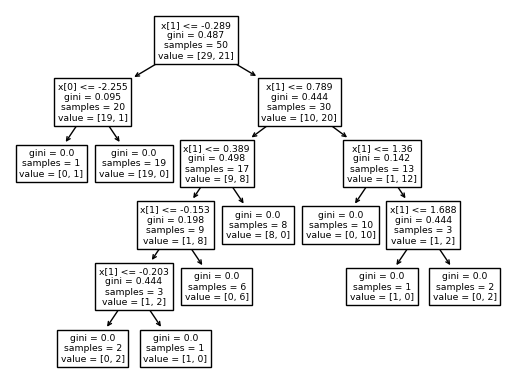

In [36]:
plot_tree(clf1)

[Text(0.6785714285714286, 0.9444444444444444, 'x[1] <= -2.115\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.6071428571428571, 0.8333333333333334, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.8333333333333334, 'x[1] <= 0.523\ngini = 0.497\nsamples = 41\nvalue = [22, 19]'),
 Text(0.6785714285714286, 0.7222222222222222, 'x[0] <= 0.73\ngini = 0.467\nsamples = 35\nvalue = [22, 13]'),
 Text(0.6071428571428571, 0.6111111111111112, 'x[0] <= -0.774\ngini = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(0.35714285714285715, 0.5, 'x[0] <= -1.335\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.21428571428571427, 0.3888888888888889, 'x[0] <= -1.619\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.14285714285714285, 0.2777777777777778, 'x[1] <= -1.563\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.07142857142857142, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.21428571428571427, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue

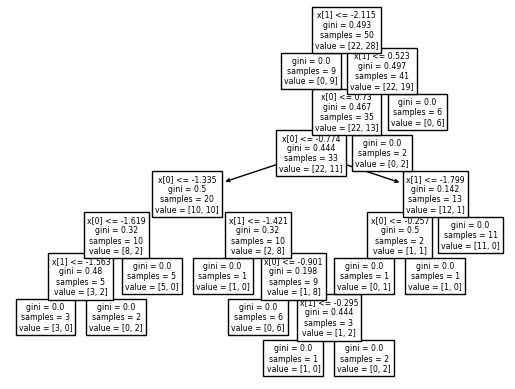

In [37]:
plot_tree(clf2)

[Text(0.5666666666666667, 0.9166666666666666, 'x[1] <= 0.154\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.26666666666666666, 0.75, 'x[0] <= -2.938\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 0.63\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= -1.561\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.13333333333333333, 0.25, 'x[0] <= -1.865\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[1] <= -0.838\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text

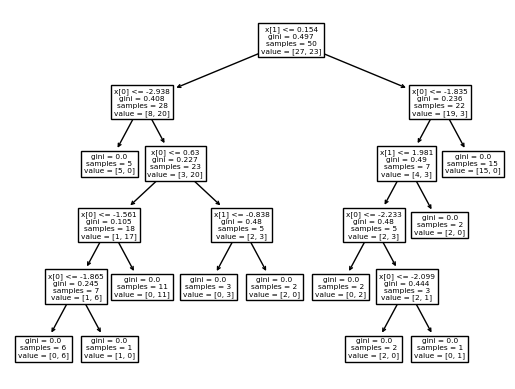

In [38]:
plot_tree(clf3)

In [39]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [42]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
38,1.810406,-3.393293,0.411873,-1.406848,0.532083,1
55,1.133517,-0.920330,-2.868384,-1.308317,-1.023846,1
88,-0.139179,1.446814,-1.806287,-0.338871,-4.349203,1
21,0.374831,-2.816075,-1.729809,-0.547489,0.956841,1
77,-1.207828,0.870987,1.230006,-1.420824,-0.635306,0
99,0.685685,-1.154423,-1.256357,-2.198252,-2.431805,1
56,-0.150216,0.135814,-2.252385,-1.541239,-2.775946,1
76,-0.857505,0.851739,-1.403245,-1.348439,-1.017678,0
10,0.188686,-2.492860,-0.937589,-2.171912,-1.529581,1
51,1.998925,0.288620,-0.204618,-1.618284,-1.206776,1
